# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
accumulation_of_incidences_counties_directory = os.getcwd()
# to print bold in math mode latex
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

C:\Users\leand\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(accumulation_of_incidences_counties_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## Plot the Distribution of the Incidences in Germany

In [3]:
incidences_of_counties_acc = dict()
for AdmUnitId, county in covid19.items():
    incidences_of_counties_acc[AdmUnitId] = (sum(county["incidences"])/
                                             len(county["incidences"]))
incidences_sums_copy = list(incidences_of_counties_acc.values()).copy()
incidences_sums_copy.sort()

C:\Users\leand\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


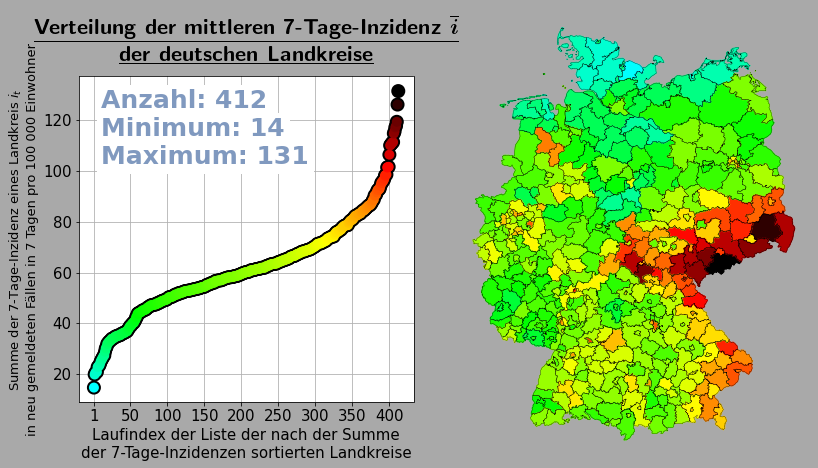

In [4]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot

plt.text(10, 125, "Anzahl: " + str(len(incidences_sums_copy)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(10, 114, "Minimum: " + str(int(incidences_sums_copy[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.text(10, 103, "Maximum: " + str(int(incidences_sums_copy[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75),
        backgroundcolor='w')
plt.title(r"\textbf{\underline{Verteilung der mittleren 7-Tage-Inzidenz "+
          r"$\boldsymbol{\overline{i}}$" +
          "}}" +
          "\n"+
          r"\textbf{\underline{der deutschen Landkreise}}",
         fontsize=22, y=1.03, usetex=True)

plt.ylabel("Summe der 7-Tage-Inzidenz eines Landkreis $i_t$\n" +
           "in neu gemeldeten Fällen in 7 Tagen pro 100 000 Einwohner",
         fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("Laufindex der Liste der nach der Summe\n"+
           "der 7-Tage-Inzidenzen sortierten Landkreise", fontsize=15)
plt.xticks([0]+[e for e in range(49,len(incidences_sums_copy), 50)],
           [1]+[e for e in range(50,len(incidences_sums_copy), 50)],fontsize=15)
plt.grid()

colors = list()
for incidences_sum in incidences_sums_copy:
    colors.append(color_scheme(incidences_sum, incidences_sums_copy))
# plot everything twice: once with black edges - once without
x=[i for i in range(len(incidences_sums_copy))]
y=incidences_sums_copy
edges=(["black" for i in range(len(incidences_sums_copy))]+
       [(0,0,0,0) for i in range(len(incidences_sums_copy))])
plt.scatter(x+x,y+y, color=colors+colors, zorder=2, s=100,
            linewidth=4, edgecolors=edges)

ax = plt.axes([1, -0.01, 0.82, 1.05], frameon=False) # [left, bottom, width, height]
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('darkgrey')
for AdmUnitId, incidences_sum in incidences_of_counties_acc.items():
    for polygon in counties_geography[AdmUnitId]['raw_geometry']:
        x,y = np.array(polygon).T
        plt.plot(x, y, color="black", linewidth=0.3)
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color_scheme(incidences_sum, incidences_sums_copy))

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.savefig("results/Ergebnisse/accumulation_incidences_counties.png",
            facecolor="darkgrey", bbox_inches=Bbox([[-0.95,-0.2],[11,6.3]]))
os.chdir(accumulation_of_incidences_counties_directory)    # return to original directory